<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/TU_Dortmund/blob/main/ASL_Sheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The logistic function (sigmoid) transforms a rel - value score f into a probability (π belongs to the interval (0,1)):

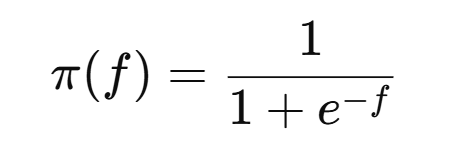

###a) Consider three new observations x(1), x(2), x(3). The estimated scoring function f assigns the following scores to the new observations:

* f(x(1)) = 1,
* f(x(2)) = 0.2,
* f(x(2)) = -2.

###Transform the scores f into probabilities π using the logistic function.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scores given by the model in a vector
f_values = np.array([1, 0.2, -2])

# Logistic function
def logistic(f):
    return 1 / (1 + np.exp(-f))

# a) Transform scores into probabilities
pi_values = logistic(f_values)

print("Probabilities from scores:")
for i, (f, pi) in enumerate(zip(f_values, pi_values), 1):
    print(f"f(x^{i}) = {f:.1f}  ->  π(x^{i}) = {pi:.4f}")

Probabilities from scores:
f(x^1) = 1.0  ->  π(x^1) = 0.7311
f(x^2) = 0.2  ->  π(x^2) = 0.5498
f(x^3) = -2.0  ->  π(x^3) = 0.1192


###b) Transform the probabilities π into class labels h using a threshold of 0.5.

It is just a simple way of classify the data as 0 or 1 label. If the logistic function returns a probabbility lower than 0.5 -> class 0 otherwise -> class 1.

In [5]:
# Apply 0.5 threshold to get class labels
h_class = (pi_values >= 0.5).astype(int)
print("Class labels (h) using threshold 0.5 on π:")
for i, h in enumerate(h_class, 1):
    print(f"h(x^{i}) = {h}")

Class labels (h) using threshold 0.5 on π:
h(x^1) = 1
h(x^2) = 1
h(x^3) = 0


###c) If we use the logistic function and the threshold of 0.5 for π, what is the equivalent threshold for f?

Manually done:
* logistic_func = 1/(1 + exp(-f)) = 0.5
* 2 = 1 + exp(-f)
* 1 = exp(-f)
* log(1) = 0 = -f = f


In [9]:
# π = sigmoid(f) = 0.5 -> solve: 1 / (1 + e^(-f)) = 0.5
# Algebraically: f = 0
f_threshold = 0
print(f"The threshold for π = 0.5 corresponds to f = {f_threshold}")

The threshold for π = 0.5 corresponds to f = 0


###c) The following graph shows the logistic function. It is a sensible function for transforming scores f into probabilities π. Slightly modify the pictured function in the graph such that it is no longer sensible for such transformations. Briefly justify your solution.

The logistic function must be monotonic (higher scores → higher probability). If you make it non-monotonic (like flipping one side), then higher scores could wrongly correspond to lower probabilities, which breaks the meaning of classification scores.

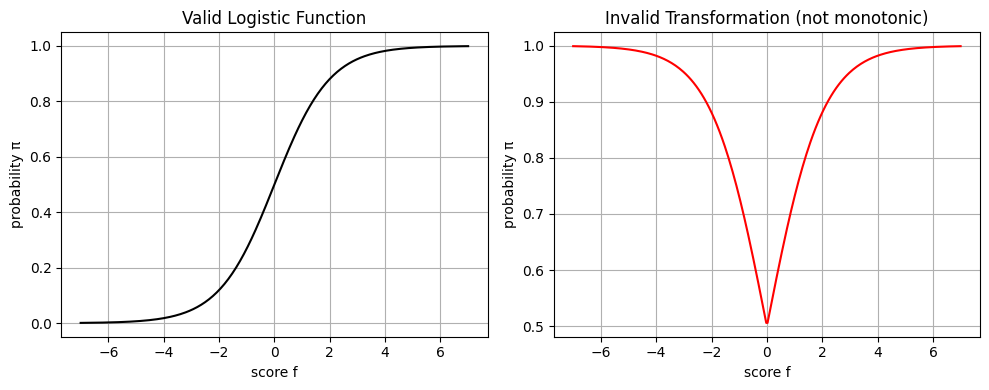

In [10]:
# d) Plot the logistic function and a "broken" version
f_plot = np.linspace(-7, 7, 300)
pi_plot = logistic(f_plot)

# Modify it badly:flipping it or make it non-monotonic
broken_pi = np.where(f_plot < 0, 1 - logistic(f_plot), logistic(f_plot))  # not monotonic

plt.figure(figsize=(10, 4))

# Normal sigmoid
plt.subplot(1, 2, 1)
plt.plot(f_plot, pi_plot, label='Sigmoid', color='black')
plt.title("Valid Logistic Function")
plt.xlabel("score f")
plt.ylabel("probability π")
plt.grid(True)

# Broken transformation
plt.subplot(1, 2, 2)
plt.plot(f_plot, broken_pi, label='Broken', color='red')
plt.title("Invalid Transformation (not monotonic)")
plt.xlabel("score f")
plt.ylabel("probability π")
plt.grid(True)

plt.tight_layout()
plt.show()

#Assume a multiclass classification setting (Y = {1, 2, 3}) where two features x1 and x2 are used. In this exercise, we only consider non-negative feature values, i. e. x1, x2 ≥ 0. The scoring classifier f = (f1, f2, f3) with:
* f1(x) = x1 + x2,
* f2(x) = -x1 + 2x2,
* f3(x) = 2x1 - 3x2

#is given. We want to classify new observations:
* x(1) = (5,1)T,
* x(2) = (3,3)T,
* x(3) = (1,4)T

#with feature vectors x = (x1,x2)T belonging to R^2 >=0 into one of the three possible classes.

###a) Calculate all scores for all new observations and display them neatly, e.g. in a table.

In [12]:
X = np.array ([[5, 1], [3, 3], [1, 4]])

# Definition of scoring functions
def f1(x):
  return x[0] + x[1]

def f2(x):
  return -x[0] + 2*x[1]

def f3(x):
  return 2*x[0] - 3*x[1]

# Calculate scores
scores = []
for x in X:
    scores.append([f1(x), f2(x), f3(x)])

# Display in a table
df_scores = pd.DataFrame(scores, columns=['f1', 'f2', 'f3'], index=['x(1)', 'x(2)', 'x(3)'])
print("a) Scores:")
print(df_scores)

a) Scores:
      f1  f2  f3
x(1)   6  -3   7
x(2)   6   3  -3
x(3)   5   7 -10


###b) Describe in one sentence how you would directly transform your calculated scores from a) into class labels from Y = {1, 2, 3}. Classify the three observations accordingly.

We are just going to pick the class with the highest score for each row. Doing the argmax over scores.
* For x(1) -> 7
* For x(2) -> 6
* For x(3) -> 7

To classify each observation, we assign the class with the highest score among the three functions.

In [13]:
predicted_classes = np.argmax(scores, axis=1) + 1  # +1 because classes are {1,2,3}

print("\nb) Predicted class labels:")
for i, c in enumerate(predicted_classes, 1):
    print(f"x({i}) → class {c}")


b) Predicted class labels:
x(1) → class 3
x(2) → class 1
x(3) → class 2


###c) Now use the softmax function to transform the calculated scores from a) into probabilities.

As we know, the softmax function converts a vector of scores into a probability distribution:

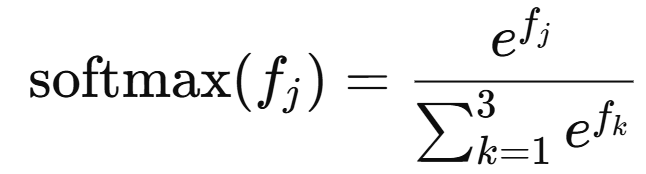

In [14]:
def softmax(f):
    f = np.array(f)
    return np.exp(f - np.max(f)) / np.sum(np.exp(f - np.max(f)))

# Apply softmax to each row
probs = np.array([softmax(row) for row in scores])

df_probs = pd.DataFrame(probs, columns=['π1', 'π2', 'π3'], index=['x(1)', 'x(2)', 'x(3)'])
print("\nc) Softmax probabilities:")
print(df_probs)


c) Softmax probabilities:
            π1        π2            π3
x(1)  0.268932  0.000033  7.310343e-01
x(2)  0.952462  0.047420  1.175432e-04
x(3)  0.119203  0.880797  3.646445e-08


###d) How does the predicted class of a fixed observation x change if we don't transform scores directly to classes (like in b)), but transform scores into probabilities with the softmax function (like in c)) and then transform those probabilities into class labels? Why is that?

As in b) we assigned the class with the maximum score and in c) we are computing softmax to get the probabilities and then choose the maximum probability to assign the class to the observation, the predicted class does not change.

This hapens because softmax is a monotonic transformation, which means tha it preserves the order of scores. The class with the highest score will always get the highest softmax probability.

###e) Why is it not possible to transform class labels h back into scores f or probabilities π?

The class labels h are discrete, it has less information than scores and probabilities.
If they give us just the h, we have lose all information about the strength of the functions predictions. Therefore, the process is not invertible, it's a many - to - one mapping process, not reversible.

The only information we can give about the probabilities given just h is that the h class has the highest probability of all three classes.

###f) Calculate the decision boundaries resulting from f using the definition from Chapter 2 Slide 9. Visualize the decision regions for x1, x2 ≥ 0. (You are welcome to submit a programmed graph, but please make sure that you would also be able to sketch it by hand.)

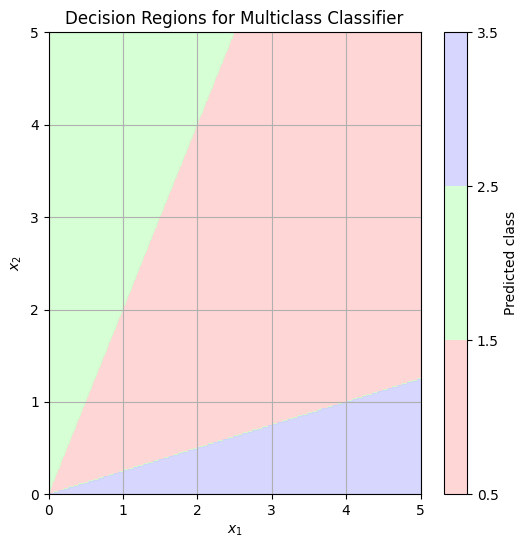

In [15]:
# Define score functions
def f1(x1, x2):
  return x1 + x2
def f2(x1, x2):
  return -x1 + 2 * x2
def f3(x1, x2):
  return 2 * x1 - 3 * x2

# Grid of points in x1, x2 space
x1_vals = np.linspace(0, 5, 300)
x2_vals = np.linspace(0, 5, 300)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)

# Compute scores at each grid point
F1 = f1(xx1, xx2)
F2 = f2(xx1, xx2)
F3 = f3(xx1, xx2)

# Determine predicted class by max score
pred_class = np.argmax(np.stack([F1, F2, F3], axis=0), axis=0) + 1

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(xx1, xx2, pred_class, levels=[0.5, 1.5, 2.5, 3.5], colors=["#ffcccc", "#ccffcc", "#ccccff"], alpha=0.8)
plt.title("Decision Regions for Multiclass Classifier")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.colorbar(label="Predicted class")
plt.show()